# Overfitting and Underfitting
## https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

## Program for understanding Overfitting and Underfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

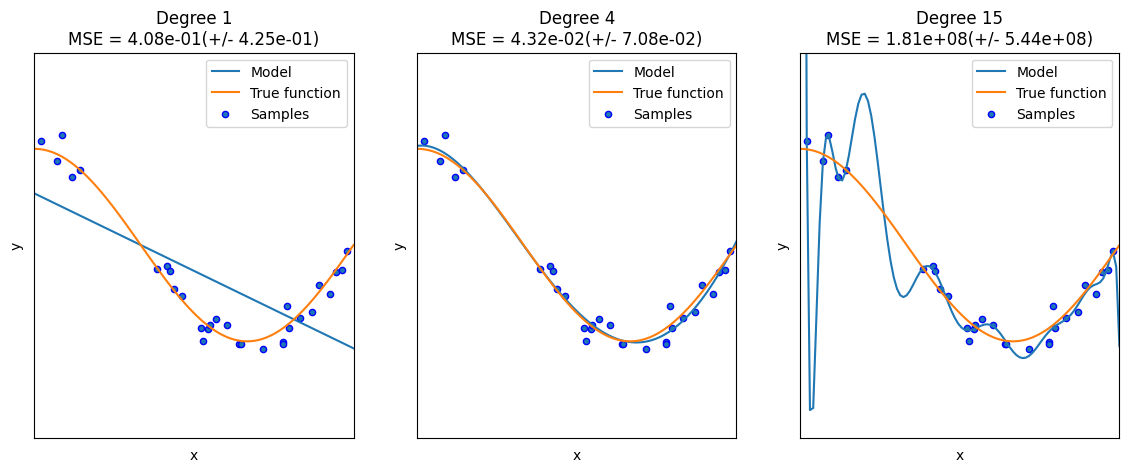

In [4]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Overfitting (Printing accuracy at different steps)
## https://machinelearningmastery.com/overfitting-machine-learning-models/

In [5]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [6]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [7]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [8]:
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

In [9]:
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.763, test: 0.767
>2, train: 0.804, test: 0.805
>3, train: 0.871, test: 0.868
>4, train: 0.906, test: 0.890
>5, train: 0.924, test: 0.901
>6, train: 0.937, test: 0.912
>7, train: 0.947, test: 0.917
>8, train: 0.956, test: 0.914
>9, train: 0.966, test: 0.917
>10, train: 0.975, test: 0.911
>11, train: 0.981, test: 0.913
>12, train: 0.985, test: 0.909
>13, train: 0.990, test: 0.909
>14, train: 0.993, test: 0.907
>15, train: 0.995, test: 0.905
>16, train: 0.996, test: 0.910
>17, train: 0.997, test: 0.908
>18, train: 0.998, test: 0.904
>19, train: 0.999, test: 0.905
>20, train: 0.999, test: 0.903
>21, train: 1.000, test: 0.902
>22, train: 1.000, test: 0.905
>23, train: 1.000, test: 0.903
>24, train: 1.000, test: 0.901
>25, train: 1.000, test: 0.901
>26, train: 1.000, test: 0.906
>27, train: 1.000, test: 0.905
>28, train: 1.000, test: 0.900
>29, train: 1.000, test: 0.900
>30, train: 1.000, test: 0.908


# -------------------------------------------------------------------------------------------------------------

# Cross-validation

## https://scikit-learn.org/stable/modules/cross_validation.html

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

### Basic method to compute score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)



0.9666666666666667

### Estimate the accuracy by splitting the data, computing the score 5 consecutive times (with different splits each time)



In [12]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [13]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


### Using the different scoring parameter

In [14]:
from sklearn import metrics

scores = cross_val_score(
    clf, X, y, cv=5, scoring='f1_macro')
scores



array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Specified multiple metrics of predefined scorer names

In [15]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['precision_macro', 'recall_macro']
clf = svm.SVC(kernel='linear', C=1, random_state=0)
scores = cross_validate(clf, X, y, scoring=scoring)
sorted(scores.keys())

scores['test_recall_macro']

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

### Calculate cross validation score by passing a cross validation iterator 

In [16]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, X, y, cv=cv)


array([0.97777778, 0.97777778, 1.        , 0.95555556, 1.        ])

### Use an iterable yielding (train, test) splits as arrays of indices

In [17]:
def custom_cv_2folds(X):
    n = X.shape[0]
    i = 1
    while i <= 2:
        idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
        yield idx, idx
        i += 1

custom_cv = custom_cv_2folds(X)
cross_val_score(clf, X, y, cv=custom_cv)

array([1.        , 0.97333333])

## Different type of Cross validation iterators


### K-fold


In [18]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]


### Repeated K-Fold

In [19]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))


[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### Leave One Out (LOO)

In [20]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))



[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


# -------------------------------------------------------------------------------------------------------------


# Validation curve

## https://keeeto.github.io/blog/bias_variance/
## https://scikit-learn.org/stable/modules/learning_curve.html

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve


In [22]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_comb = df_train.append(df_test)

X = pd.DataFrame()


C:\Users\jon\AppData\Local\Temp\ipykernel_112876\2079559664.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = df_train.append(df_test)


In [23]:
def encode_sex(x):
    return 1 if x == 'female' else 0

def family_size(x):
    size = x.SibSp + x.Parch 
    return 4 if size > 3 else size

X['Sex'] = df_comb.Sex.map(encode_sex)
X['Pclass'] = df_comb.Pclass
X['FamilySize'] = df_comb.apply(family_size, axis=1)

In [24]:
fare_median = df_train.groupby(['Sex', 'Pclass']).Fare.median()
fare_median.name = 'FareMedian'

age_mean = df_train.groupby(['Sex', 'Pclass']).Age.mean()
age_mean.name = 'AgeMean'

def join(df, stat):
    return pd.merge(df, stat.to_frame(), left_on=['Sex', 'Pclass'], right_index=True, how='left')

X['Fare'] = df_comb.Fare.fillna(join(df_comb, fare_median).FareMedian)
X['Age'] = df_comb.Age.fillna(join(df_comb, age_mean).AgeMean)

In [25]:
def quantiles(series, num):
    return pd.qcut(series, num, retbins=True)[1]

def discretize(series, bins):
    return pd.cut(series, bins, labels=range(len(bins)-1), include_lowest=True)
    
X['Fare'] = discretize(X.Fare, quantiles(df_comb.Fare, 10))
X['Age'] = discretize(X.Age, quantiles(df_comb.Age, 10))


In [26]:
X_train = X.iloc[:df_train.shape[0]]
X_test = X.iloc[df_train.shape[0]:]

y_train = df_train.Survived


In [27]:
clf_1 = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=0)
clf_1.fit(X_train, y_train)
# Number of folds for cross validation
num_folds = 7

In [28]:
def plot_curve(ticks, train_scores, test_scores):
    train_scores_mean = -1 * np.mean(train_scores, axis=1)
    train_scores_std = -1 * np.std(train_scores, axis=1)
    test_scores_mean = -1 * np.mean(test_scores, axis=1)
    test_scores_std = -1 * np.std(test_scores, axis=1)

    plt.figure()
    plt.fill_between(ticks, 
                     train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="b")
    plt.fill_between(ticks, 
                     test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(ticks, train_scores_mean, 'b-', label='Training score')
    plt.plot(ticks, test_scores_mean, 'r-', label='Validation score')
    plt.legend(fancybox=True, facecolor='w')

    return plt.gca()


In [29]:
def plot_validation_curve(clf, X, y, param_name, param_range, scoring='roc_auc'):
    plt.xkcd()
    ax = plot_curve(param_range, *validation_curve(clf, X, y, cv=num_folds, 
                                                   scoring=scoring, 
                                                   param_name=param_name, 
                                                   param_range=param_range, n_jobs=-1))
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlim(2,12)
    ax.set_ylim(-0.97, -0.83)
    ax.set_ylabel('Error')
    ax.set_xlabel('Model complexity')
    ax.text(9, -0.94, 'Overfitting', fontsize=22)
    ax.text(3, -0.94, 'Underfitting', fontsize=22)
    ax.axvline(7, ls='--')
    plt.tight_layout()
    

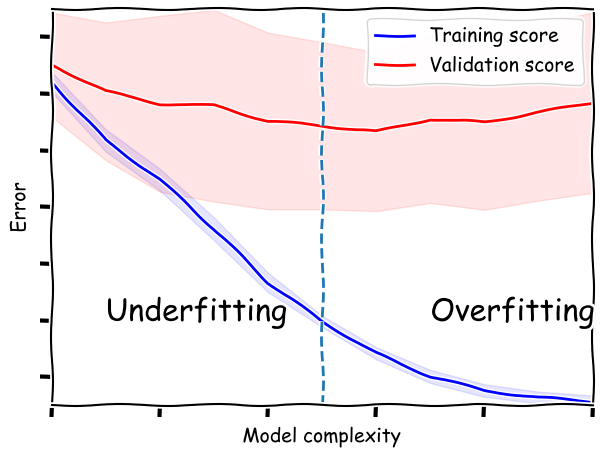

In [30]:
plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(2,13))


# -------------------------------------------------------------------------------------------------------------


# ROC
## https://www.statology.org/plot-roc-curve-python/

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [32]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

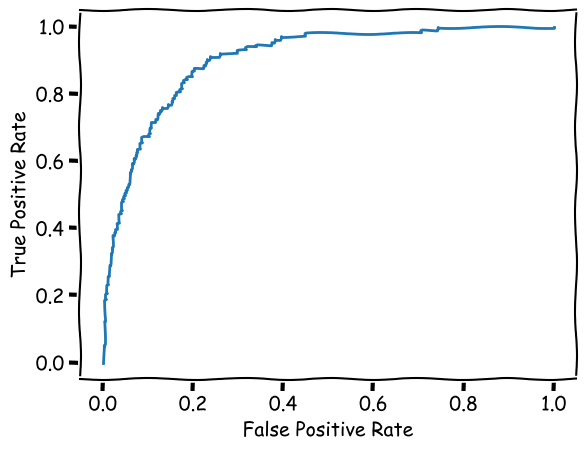

In [33]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Task 1: Perform all of the above codes of Overfitting, Cross Validation, etc. with the help of the given reference link.

# Task 2: Explain your analysis of the code. Make a detailed analysis that can also cover the following questions: (Submit the PDF of Report)

###             1) According to you, why do overfitting and underfitting occur, and how resolve them? What is the difference between them?
###             2) What kind of pattern did you analyze in the Train and Test score while running the code of overfitting?
###             3) What is cross-validation, and what did you analyze in a different type of validation that you performed?
###             4) Explain the analysis from generated ROC and validation curve and what they represent?

# Task 3: Using the given Cross Validation iterators perform all types of Cross Validations we did in the task :
	
###             1) K-fold
###             2) Repeated K-Fold
###             3) Leave One Out (LOO)

## Apart from this three, try to perform validation using three new iterators.

# Task 4: With the help of the given code and references complete all of the following step:
  
###            1) Choose one new dataset. Train a overfitted model with the help of any machine learning technique, such as KNN, classification, regression.
###            2) Try to resolve the overfitting.
###            3) Calculate the Validation score by any two or three given techniques and Validation iterators.
###           4) Generate the validation curve 
###           5) Predict the output of testing data.
###           6) Generate the ROC curve using the predicted data and actual data.

	

Task 1: Complete

Task 2:</br>
1.) Overfitting and underfitting occur because of the quality of training and testing data combined with poor methods of creating datasets from the data to accurately train and test the model. To resolve them, you can add more data, fix the quality of your data, add or remove features, and create better seperations between the training and testing data. The difference between overfitting and underfitting is that overfitting is when a model doesn't generalize well outside the training data and underfitting is when the model doesn't generalize well and doesn't perform well on the training data.<br/>
2.) That train score was very high to the point it reached perfect and the test score was unusually high.</br>
3.) Cross-validation is a way to evaluate the efficacy of a model by training it with different subsets of the data. </br>
4.) It shows that the model does a good job at classifying the data. The larger the area under the curve, the better the model fits.

Task 3:

In [36]:
from sklearn.model_selection import LeavePOut

print("LeavePOut -------------")

X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

from sklearn.model_selection import ShuffleSplit

print("\n")
print("ShuffleSplit -------------")

X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

print("\n")
print("StratifiedKFold -------------")

X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y[train]), np.bincount(y[test])))

LeavePOut -------------
[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


ShuffleSplit -------------
[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


StratifiedKFold -------------
train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


Task 4:

C:\Users\jon\AppData\Local\Temp\ipykernel_112876\1037316486.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comb = df_train.append(df_test)


LogisticRegression(max_iter=1000)

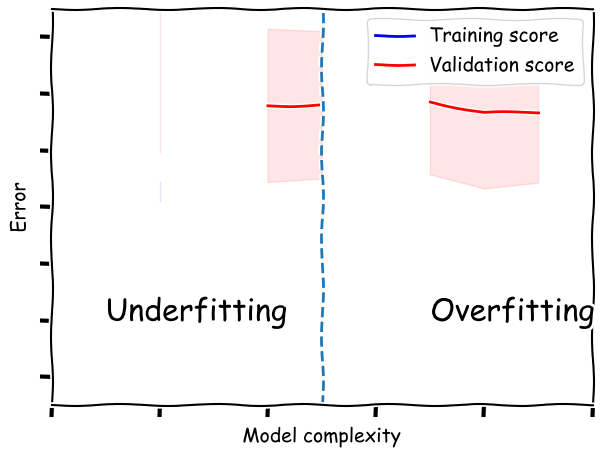

In [61]:
df_train = pd.read_csv('data/weatherAlbury.csv')
df_train = df_train.dropna()
df_train['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df_train['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

df_test = pd.read_csv('data/weatherObs.csv')
df_test['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

df_comb = df_train.append(df_test)

X = df_train[["MinTemp", "MaxTemp", "Rainfall", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm", "RainToday"]]
y = df_train.RainTomorrow
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

plot_validation_curve(clf_1, X_train, y_train, param_name='max_depth', param_range=range(0,100))

#instantiate the model
log_regression = LogisticRegression(max_iter = 1000)

#fit the model using the training data
log_regression.fit(X_train,y_train)

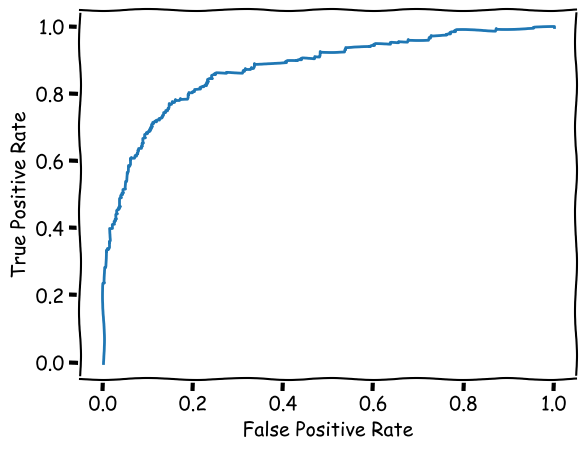

In [63]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()